# Glass Quality Prediction

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Name of each Column
column_names=["Id number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]
# loading the dataset.
df_glass=pd.read_csv("glass.csv", names=column_names)
df_glass

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


We can notice that there are 214 rows and 11 columns present. In the dataset column name of each column indicated as
1. Id number: row number of data from 1 to 214
2. RI: Refractive Index 
3. Na: Sodium
4. Mg : Magnesium
5. Al : Aluminium
6. Si : Silicon
7. K : Potassium
8. Ca : Calcium
9. Ba : Barium
10. Fe : Iron
11. Type of Glass

Our interest is to predict type of glass.

In [3]:
# Column Names
df_glass.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [4]:
# column data types
df_glass.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

Data types of each column repesents its data type wheather it is integer data , float data or object data / string data. Here we can notice that data type of each column is numerical data where id number  and type of glass is integer data and rest are float data.

As Id number is just a number for the data of each row. it has no significant role to predict the type of glass. for that we can drop that column named "Id number" or we can set index of that column. hare i am droping that column.

In [5]:
# droping 'Id number' column
df_glass.drop("Id number", axis=1, inplace=True)

In [6]:
# Checking for null value present in the dataset
print(df_glass.isnull().sum())

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


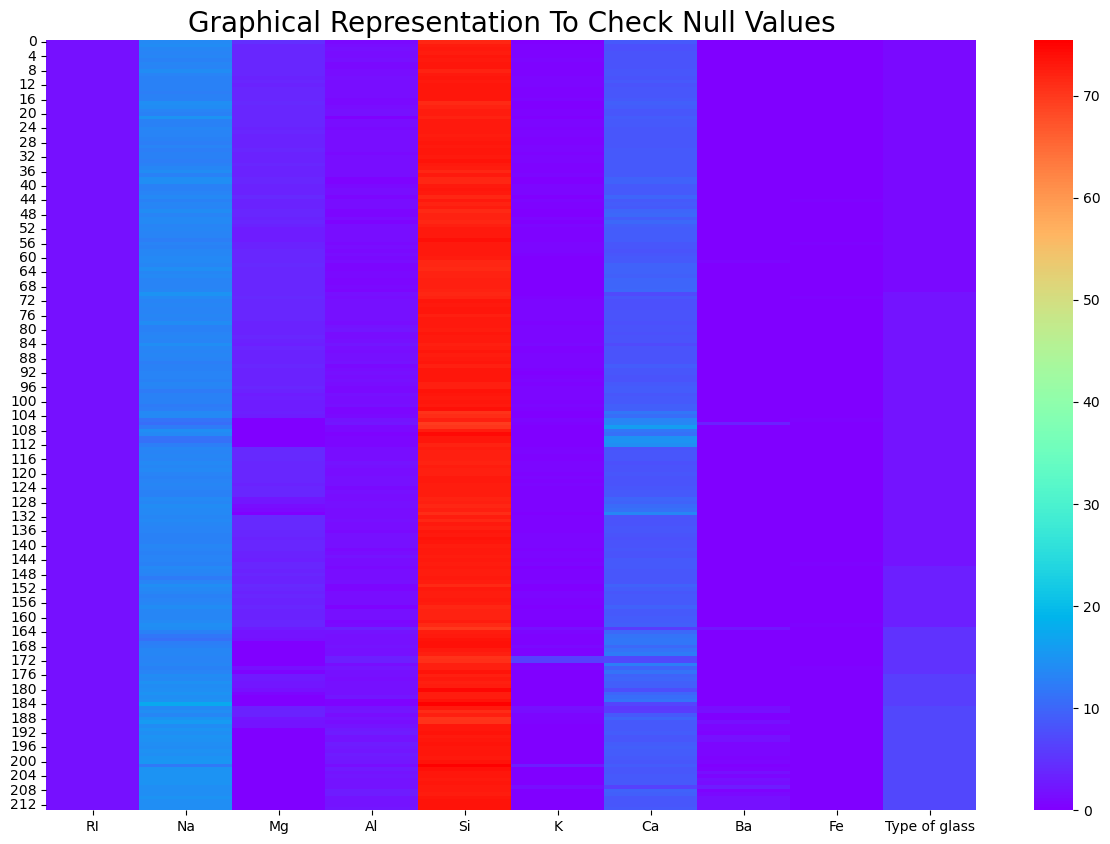

In [7]:
#Graphically checking for null value
plt.figure(figsize=(15,10))
sns.heatmap(data=df_glass, cmap="rainbow",linecolor='white')
plt.title("Graphical Representation To Check Null Values", fontsize=20)
plt.show()

In the heatmap we can notice that in x label there is column names and in y label there is index no of each row. Hare color of heatmap should be of single color as there is no null values or missing values. if there any missing value present then we should notice a white color line in that column. Hence We need to look data set deeply by using value counts for each columns.
multicolor shows because of outliers present inside the dataset.

In [8]:
# No of unique value present in each column
df_glass.nunique()

RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [9]:
# looking for value and its countings in each column
for i in df_glass.columns:
    print(df_glass[i].value_counts())

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64
8.03    5
8.43    5
9.57    4
8.79    4
8.44    4


From the value counts data we can notice that there are no missing data present but in some column like Mg, K, Ba, Fe column there zero value is present. If we see their data we can observe that data which have zero data and other data those are non zero they are close to zero. hence zero might be the real value for those column. in the type of glass column it is shown that there are 6 ordinal data which refers to a classification problem.

In [10]:
# All unique values in each column
for i in df_glass.columns:
    print("column Name :",i)
    print(df_glass[i].unique())
    print("\n")

column Name : RI
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51662 1

In the above operation we can notice the all unique value presents in each column.

In [11]:
# defining a function that will differentiate wheather the glass is window glass or not.
def window(x):
    if x>=1 and x<=4:
        return 1
    elif x>=5 and x<=7:
        return 0

In [12]:
# Creating a column of window glass where 0 = window glass and 1= non window glass
df_glass["Window glass"]=df_glass['Type of glass'].apply(window)
df_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Window glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0


In [13]:
# checking randomly sample data of the dataset
df_glass.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Window glass
94,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.00,0.00,2,1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,0
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2,1
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,1
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7,0
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00,3,1
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00,2,1
151,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00,3,1
43,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.00,0.00,1,1
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00,3,1


In the sample data we can see that in window glass column there are only two data 0 and 1. where 1 represents window glass and 0 represents non window glass. hare window glass is our target variable. Hence we can drop the Column of 'Type of glass'.

In [14]:
# dropping the column 'Type of glass' column
df_glass.drop("Type of glass", axis=1, inplace = True)
df_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Window glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,0


In [15]:
df_glass['Window glass'].shape

(214,)

In [16]:
# Checking the counting of window glass and non window glass
df_glass['Window glass'].value_counts()

1    163
0     51
Name: Window glass, dtype: int64

This is a classification based problem where "Window glass" is the target variable and all other column is the input variable. In the target variable we can see that window glass is of 163 numbers and non window glass is of 51 numbers. then it is the case of  imbalance.

In [17]:
# Basic information of the dataset
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RI            214 non-null    float64
 1   Na            214 non-null    float64
 2   Mg            214 non-null    float64
 3   Al            214 non-null    float64
 4   Si            214 non-null    float64
 5   K             214 non-null    float64
 6   Ca            214 non-null    float64
 7   Ba            214 non-null    float64
 8   Fe            214 non-null    float64
 9   Window glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


The Basic information of the glass dataset shows us that there is 214 rows indexed from 0 to 213. Each column has no missing value. and all the input variables are float datatype and output data, window glass is integer datatype.

In [18]:
# Checking statistical summary
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Window glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.761682
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


Observations:
1. Count of every column is 214. which reffers that there is no missing value.
2. In the clolumn Magnesium (Mg), Potassiun(K) mean is less than median which reffers to left skewness of the data. In the column Aluminum (Al), Calcium (Ca), Barium (Ba) mean is greater than median which refers the right skewness of the data. other column like Refractive Index (RI), Sodium (Na), Silicon (Si) , Iron (Fe) mean is nearly same as median which refers normal distribution of data.
3. The difference between 75th percentile and Maximum value is higher side as compared to the difference between median amd 75th percentile in the column namely Sodium, Magnesium, Aluminium, Potassium, Calsium, Barium column. which refers the presence of outliers.

# Data Visualization

### Univariate Analysis

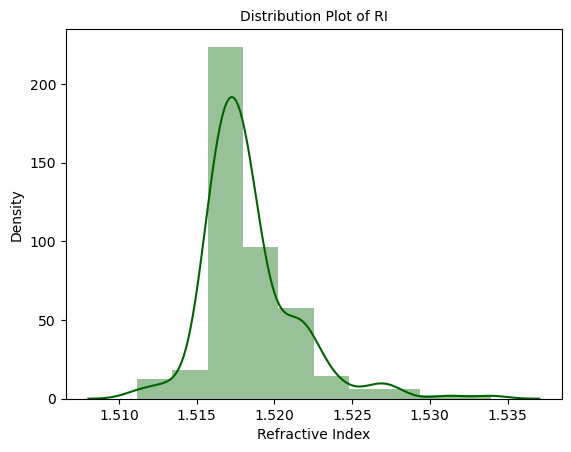

In [19]:
# Checking Distribution of data in the column Refractive index
sns.distplot(df_glass['RI'], bins=10, color="darkgreen")
plt.title("Distribution Plot of RI", fontsize=10)
plt.xlabel("Refractive Index",fontsize=10)
plt.ylabel("Density",fontsize=10)
plt.show()

The distribution plot of the refractive index shows us the disdtibution of the data which consist of histogram and kernel density estimate curve. the kde graph shows us that data is almost normally distributed and slifgtly skewed towards right. 

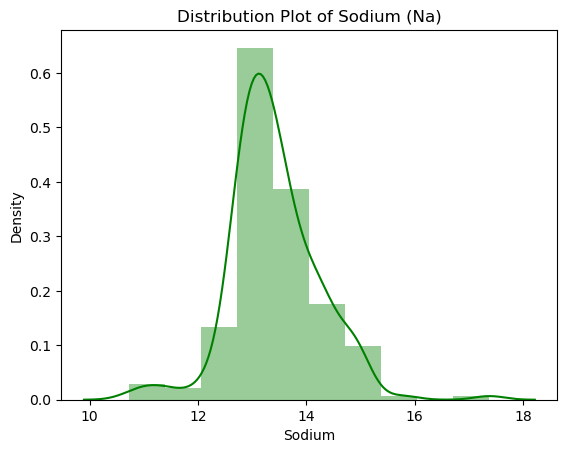

In [20]:
# Checking distribution of the data of the column Sodium (Na)
sns.distplot(df_glass['Na'], bins=10, color='green')
plt.title("Distribution Plot of Sodium (Na)",fontsize=12)
plt.xlabel("Sodium", fontsize=10)
plt.ylabel("Density",fontsize=10)
plt.show()

Distribution plot of Sodium shows that the kde is normally distributed.

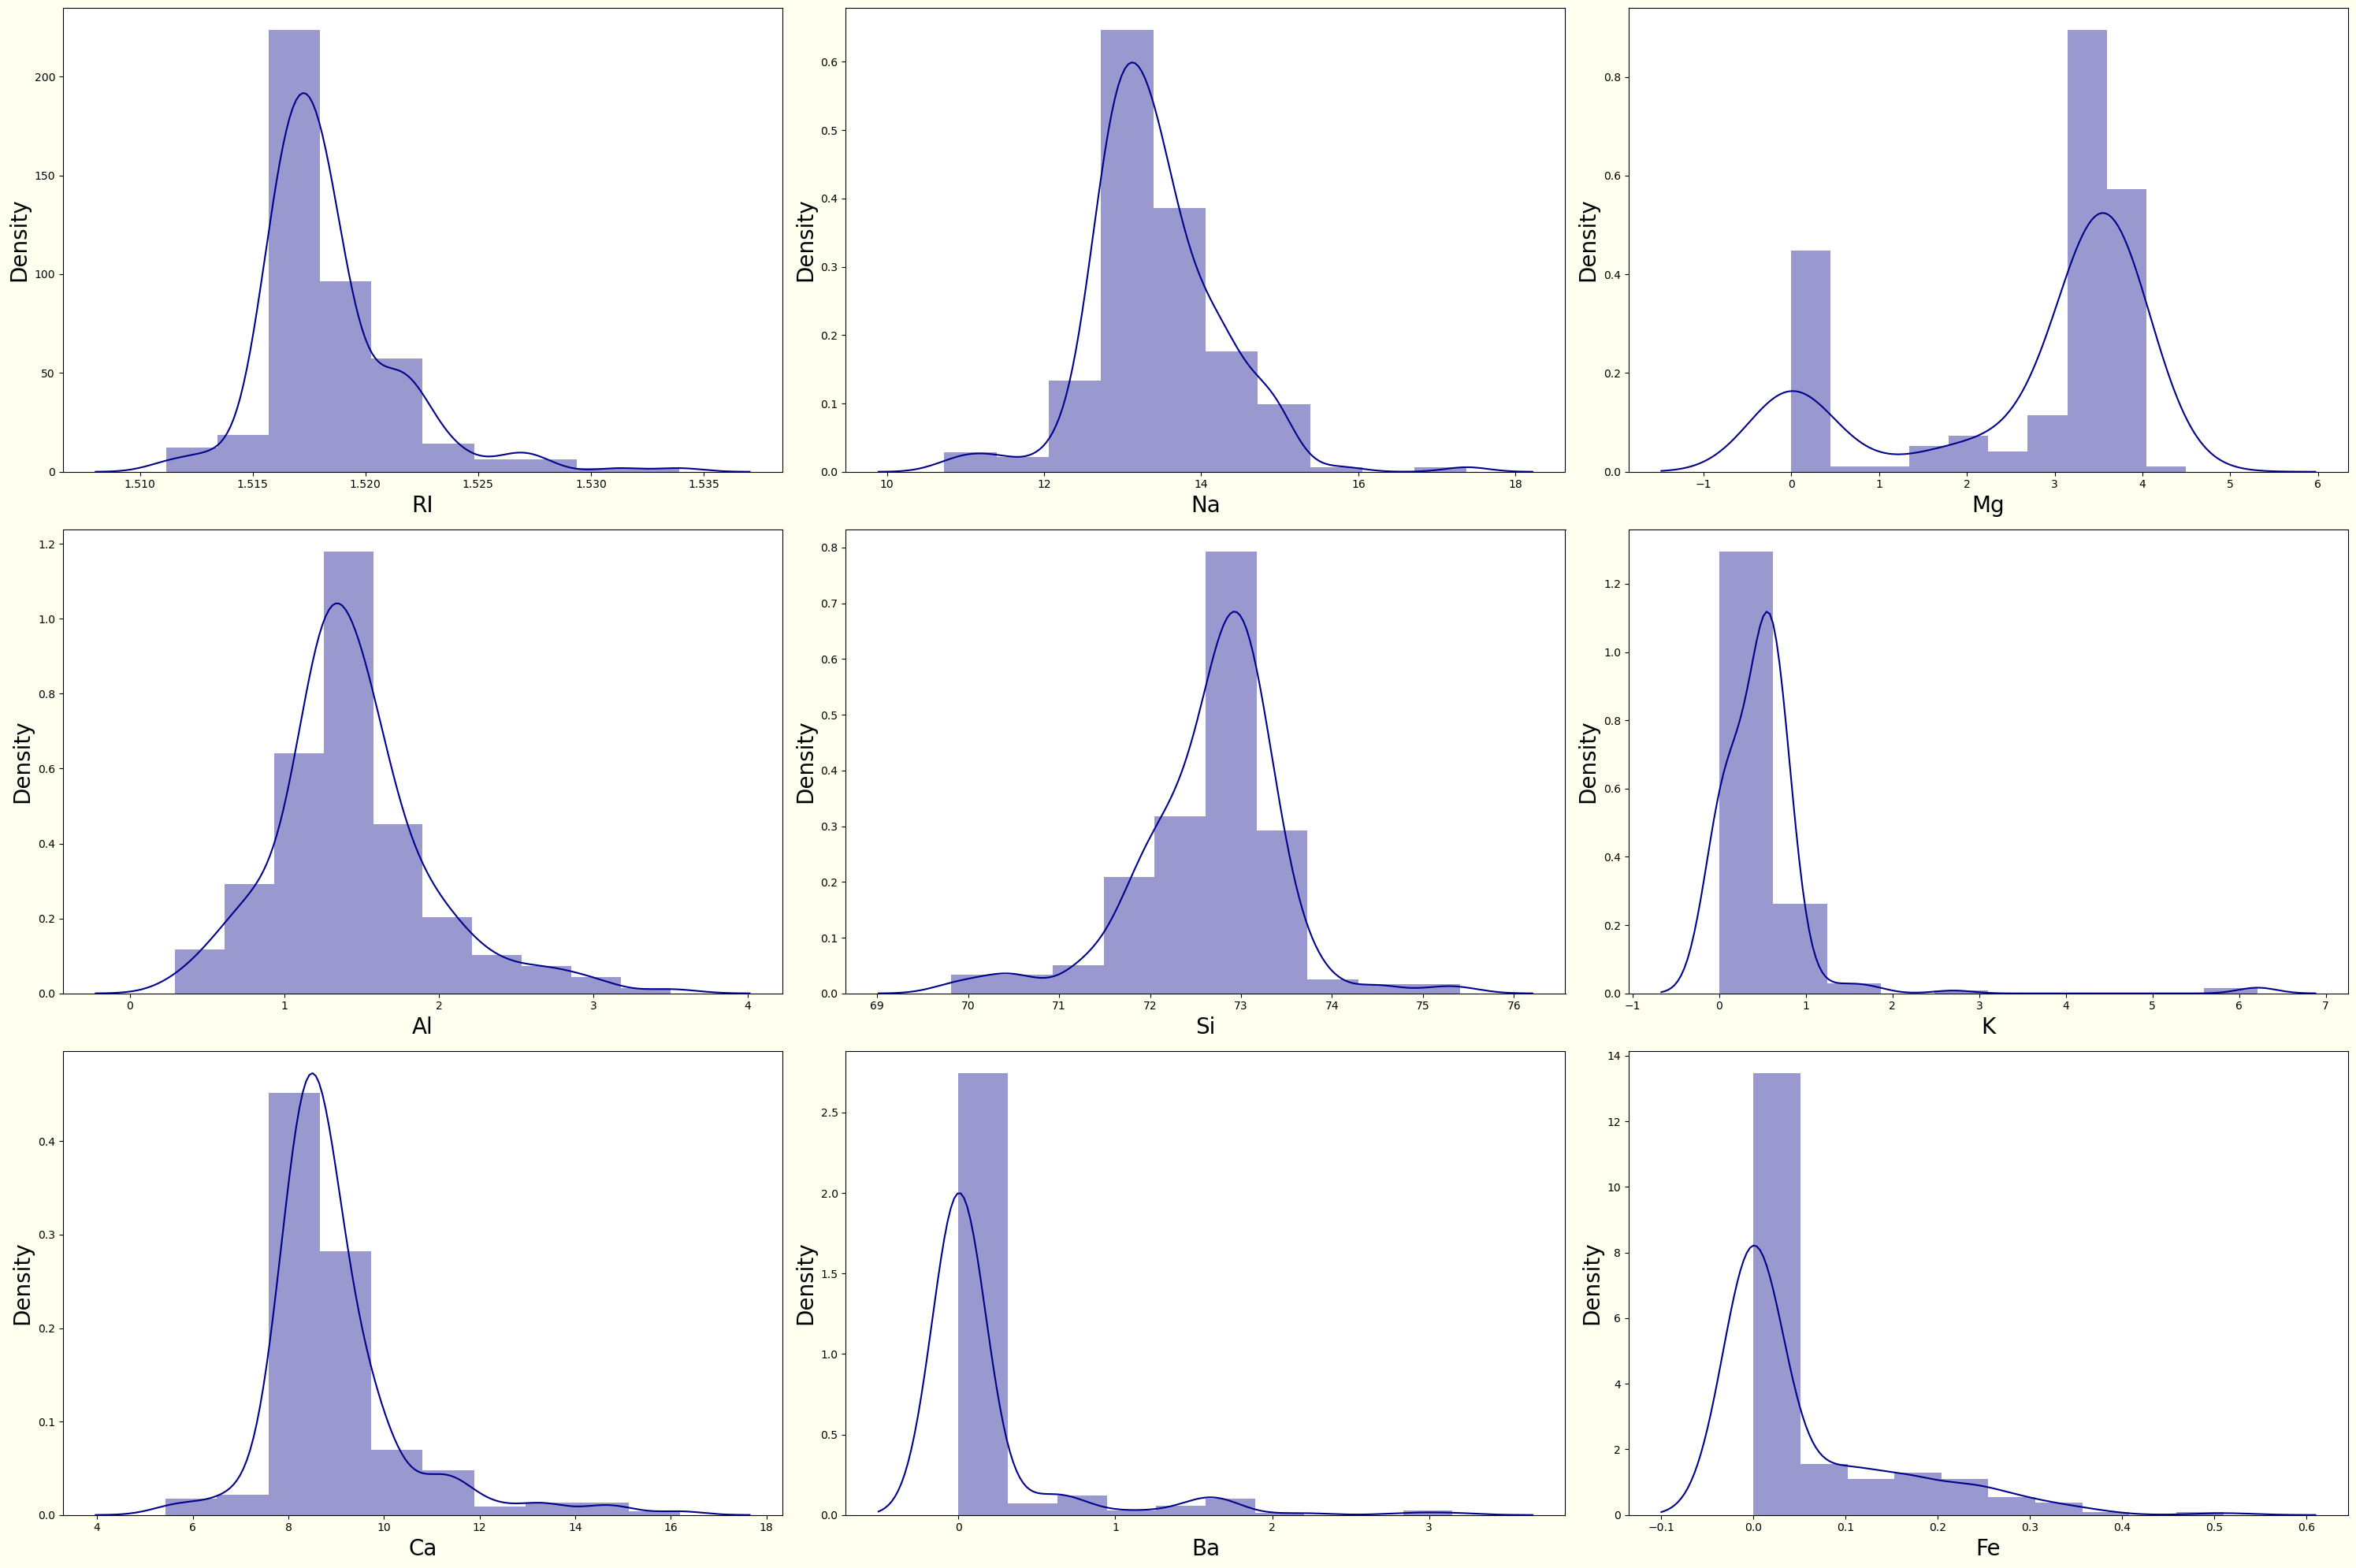

In [21]:
# Checking distribution plot for each column
plotnum=1
plt.figure(figsize=(30,20), facecolor='ivory')

for i in df_glass.columns:
    if plotnum<=9:
        plt.subplot(3,3,plotnum)
        sns.distplot(df_glass[i], bins=10, color='darkblue')
        plt.xlabel(i, fontsize=20)
        plt.ylabel("Density",fontsize=20)
    plotnum+=1
plt.tight_layout()      

Observation:
1. Most of the data is normally distributed like RI, Na, Al, Ca columns. 
2. There are some left skewd data like Si and Mg column.
3. There are some right skewes data like Ba and Fe column.

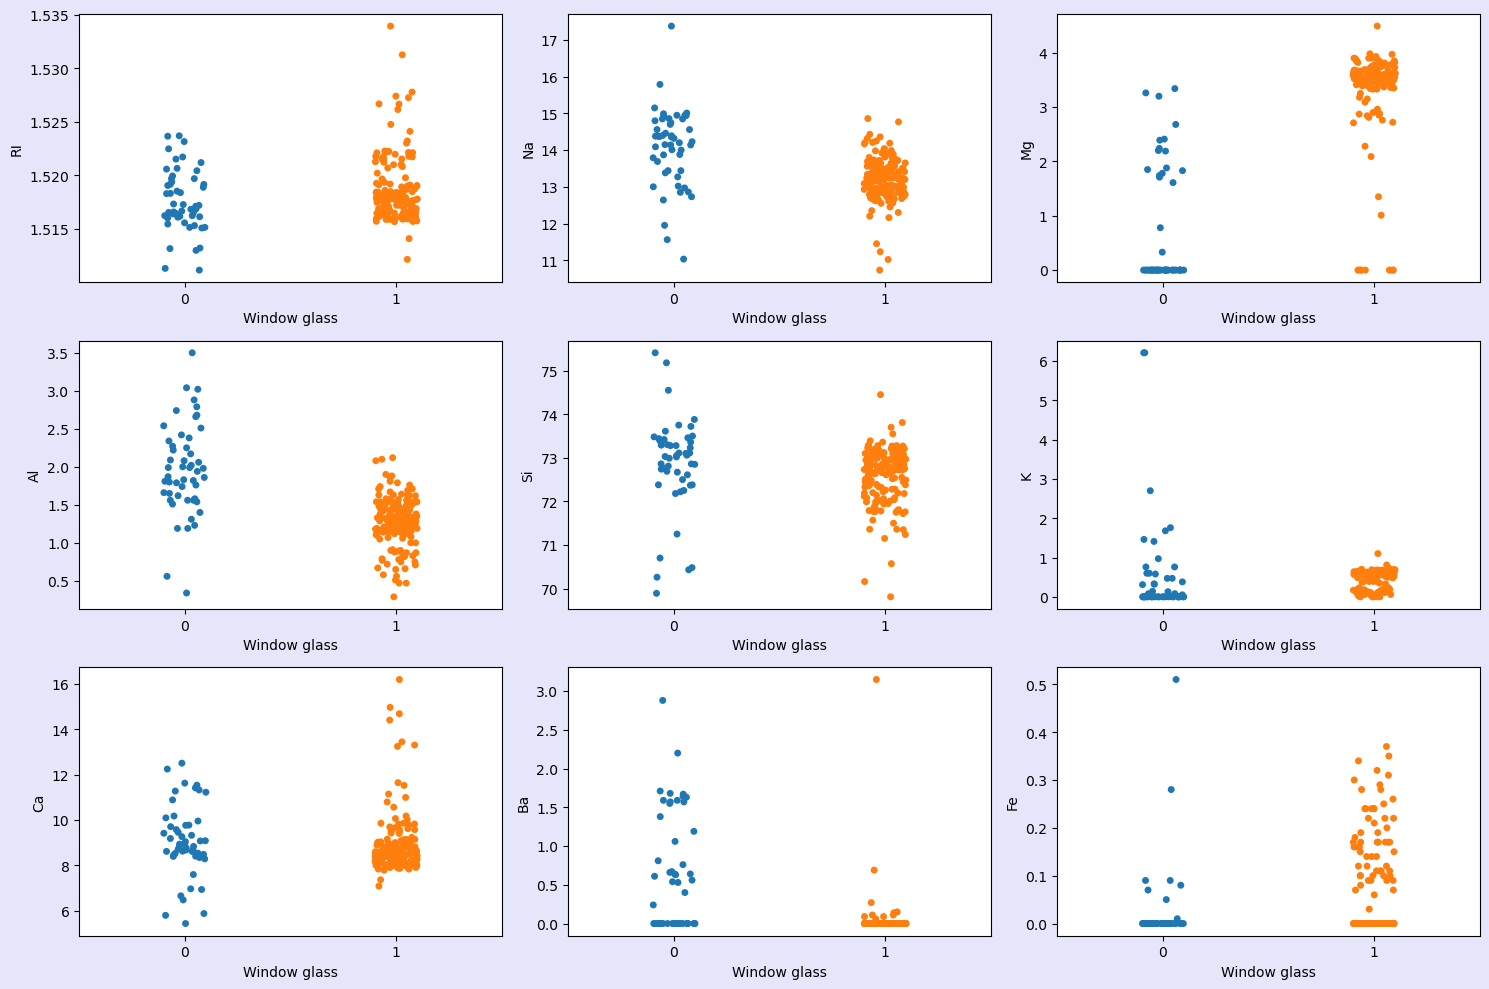

In [22]:
# Checking for stripplot for each column
plt.figure(figsize=(15,10),facecolor='lavender')
plotnumber=1

for i in df_glass.columns:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.stripplot(data=df_glass, x='Window glass', y=i)
    plotnumber+=1
plt.tight_layout()

From the strip plot from all of the above we have seen that 
1. Fow window glass refractive index is mostly about from 1.515 to 1.525. and for non window glass there is not such accumulation of data for refractive index in some perticular range of data. it is scattered in form.
2. Range of Sodium for window glass is from 12 to 15. whereas for non window glass it is 13 to 15. not such big difference between them.
3. Range of Magnessium for window glasses is about 3 to 4. where as for non window glass it is in lower side.
4. Range of Aluminium for window glasses is about 0.5 to 2.0 where as for non window glasses it is 1.5 to 3.0.
5. Range of Silicon for window glasses is about 71.5 to 73.5 . Where as for non window glasses it about 72.0 to 74.0.
6. Range of Potassium for both the type of glass is in lower side.
7. Range of Calcium for window glasses is about 8 to 11. Where as for non window glass it is about 6 to 13. 
8. Range of Bareium  for non window glasses is on higher side as compared to the window glasses.
9. RAnge of Iron for window glasses is in higher side as compared to the non window glass.

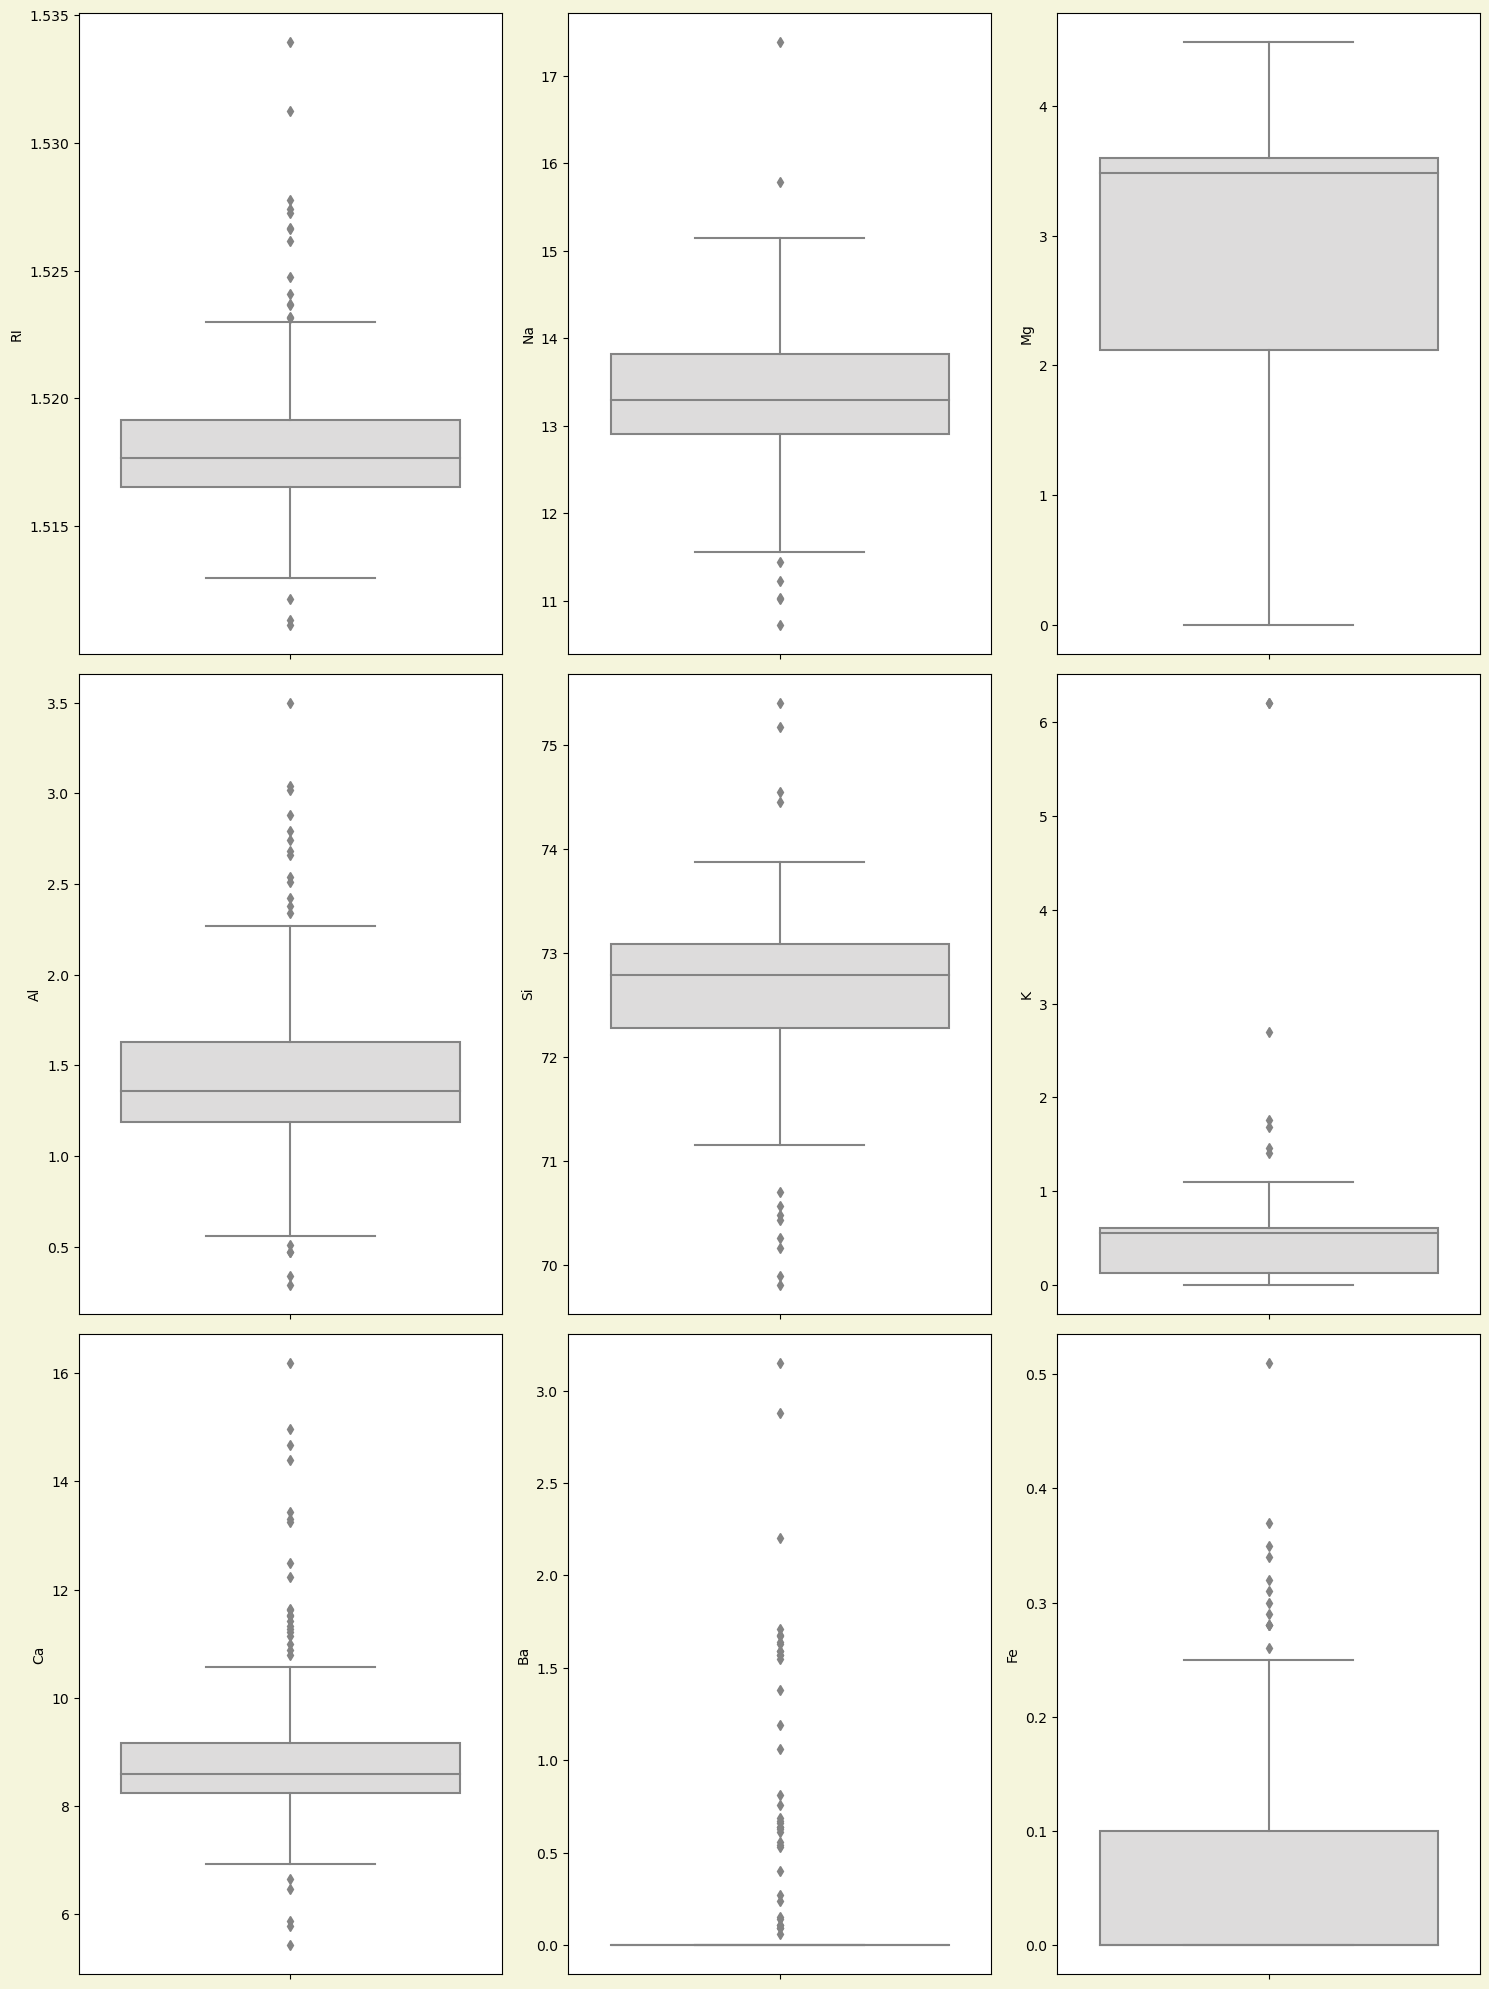

In [23]:
# Checking boxplot in each column
plotnum=1
plt.figure(figsize=(15,20),facecolor='beige')
for i in df_glass.columns:
    if plotnum<=9:
        plt.subplot(3,3,plotnum)
        sns.boxplot(data=df_glass,y=i,hue='Window glass',palette='coolwarm')
    plotnum+=1
plt.tight_layout()

Observations:
Almost in every column there is outliers present. outliers present in the following columns RI, Na, Al, Si, K, Ca, Ba and Fe

1    163
0     51
Name: Window glass, dtype: int64


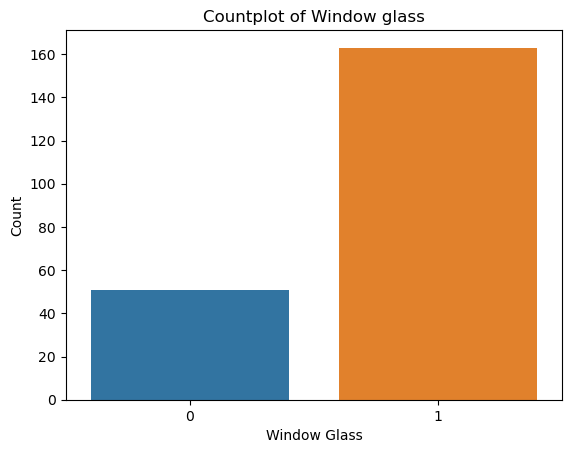

In [24]:
# checking the no of window glass and non window glass
print(df_glass['Window glass'].value_counts())
sns.countplot(df_glass['Window glass'])
plt.title("Countplot of Window glass")
plt.xlabel("Window Glass")
plt.ylabel("Count")
plt.show()

### Bivariate analysis

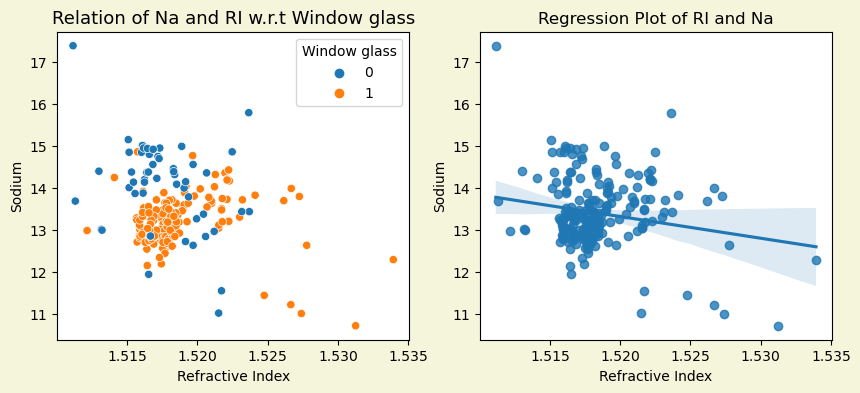

In [25]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of Na and RI with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='Na',hue='Window glass')
plt.title("Relation of Na and RI w.r.t Window glass", fontsize=13)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Sodium", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Sodium
sns.regplot(data=df_glass,x="RI",y="Na")
plt.title("Regression Plot of RI and Na")
plt.xlabel("Refractive Index")
plt.ylabel("Sodium")

plt.show()

From the above scatterplot we can conclude that non window glass possesses higher Na values where as window glass possesses less Na as compared to non window glass.

Regression plot of RI and Na shows that there is slightly negative relation between Refractive index and Sodium.

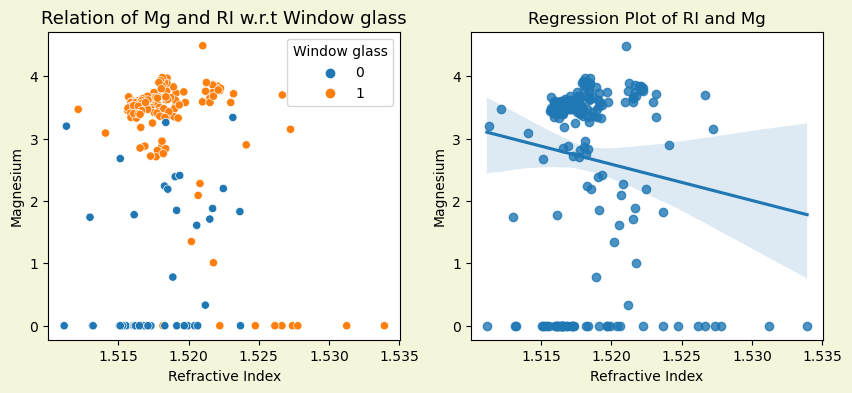

In [26]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of Mg and RI with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='Mg',hue='Window glass')
plt.title("Relation of Mg and RI w.r.t Window glass", fontsize=13)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Magnesium", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Magnesium
sns.regplot(data=df_glass,x="RI",y="Mg")
plt.title("Regression Plot of RI and Mg")
plt.xlabel("Refractive Index")
plt.ylabel("Magnesium")

plt.show()

In the scatter plot of Mg and RI we can see that Non window glasses possesses less Magnesium as compared to the window glass.

In the regression plot of Mg and RI there is negative relation between them.

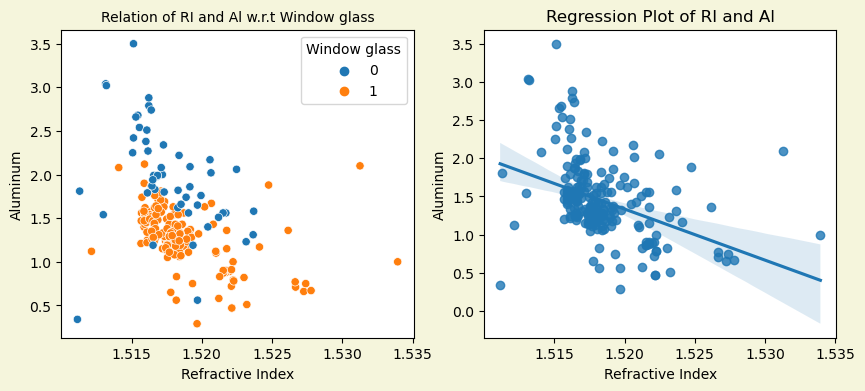

In [27]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of RI and Al with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='Al',hue='Window glass')
plt.title("Relation of RI and Al w.r.t Window glass", fontsize=10)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Aluminum", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Aluminium
sns.regplot(data=df_glass,x="RI",y="Al")
plt.title("Regression Plot of RI and Al")
plt.xlabel("Refractive Index")
plt.ylabel("Aluminum")

plt.show()

In the scatter plot of Aluminium and Refractive index we can see that Non window glass possesses higher Aluminum as compared to the window glass.

In the Regression plot of Aluminium vs Refractive index there is a negative relation between them.

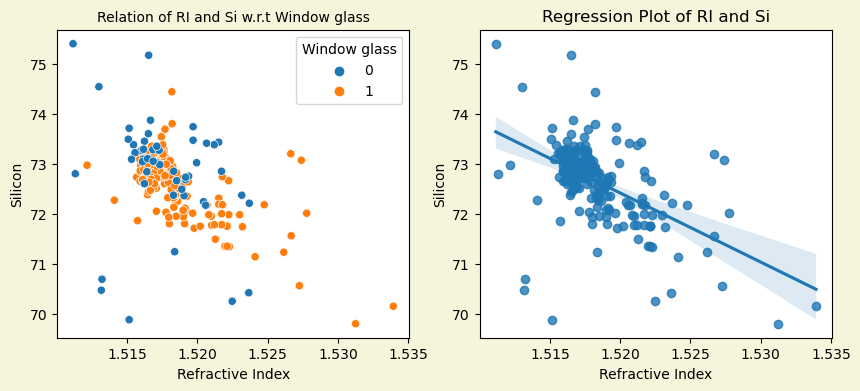

In [28]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of RI and Si with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='Si',hue='Window glass')
plt.title("Relation of RI and Si w.r.t Window glass", fontsize=10)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Silicon", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Silicon
sns.regplot(data=df_glass,x="RI",y="Si")
plt.title("Regression Plot of RI and Si")
plt.xlabel("Refractive Index")
plt.ylabel("Silicon")

plt.show()

Window glass contains less silicon as compared to the non window glass. There is negative relation between Silicon and Refractive index.

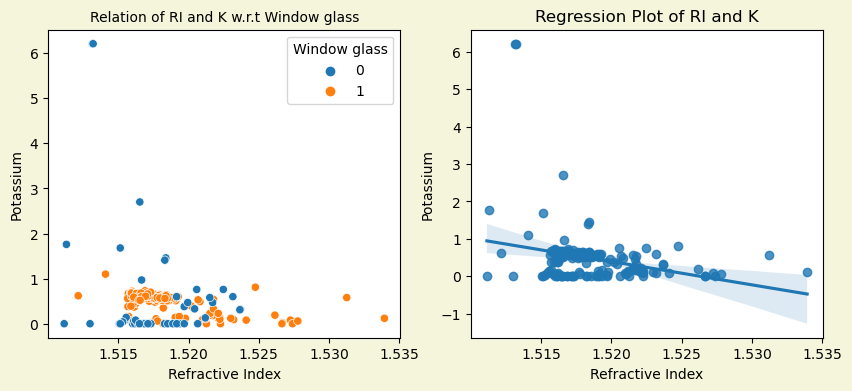

In [29]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of RI and K with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='K',hue='Window glass')
plt.title("Relation of RI and K w.r.t Window glass", fontsize=10)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Potassium", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Potassium
sns.regplot(data=df_glass,x="RI",y="K")
plt.title("Regression Plot of RI and K")
plt.xlabel("Refractive Index")
plt.ylabel("Potassium")

plt.show()

Window glass contain more potassium as compared to non window glass.  In the regression graph there is slightly negative correlation between Refractive index and Potassium.

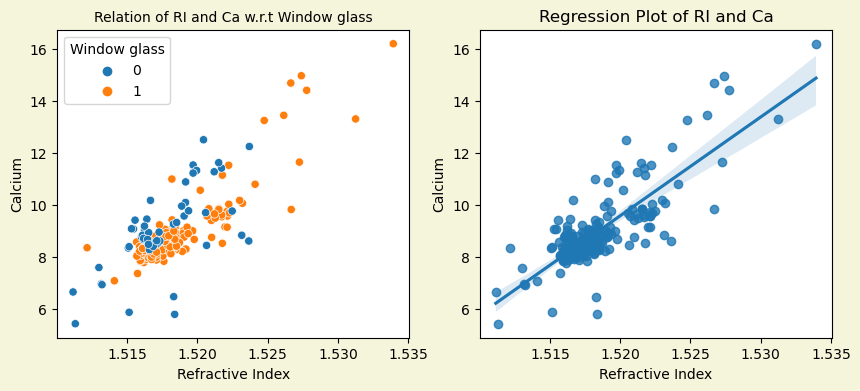

In [30]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of RI and Ca with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='Ca',hue='Window glass')
plt.title("Relation of RI and Ca w.r.t Window glass", fontsize=10)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Calcium", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Calcium
sns.regplot(data=df_glass,x="RI",y="Ca")
plt.title("Regression Plot of RI and Ca")
plt.xlabel("Refractive Index")
plt.ylabel("Calcium")

plt.show()

Window glass contains less calsium as compared to the Non window glass. There is positive correlation between calcium and Refractive index.

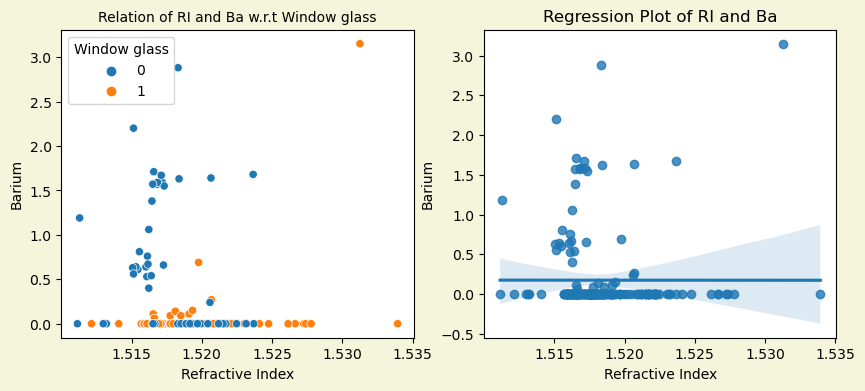

In [31]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of RI and Ba with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='Ba',hue='Window glass')
plt.title("Relation of RI and Ba w.r.t Window glass", fontsize=10)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Barium", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Barium
sns.regplot(data=df_glass,x="RI",y="Ba")
plt.title("Regression Plot of RI and Ba")
plt.xlabel("Refractive Index")
plt.ylabel("Barium")

plt.show()

Nothing is conclusive in the above graph of scatter plot. and from the regression plot we can conclude that refractive index does not depends upon Barium.

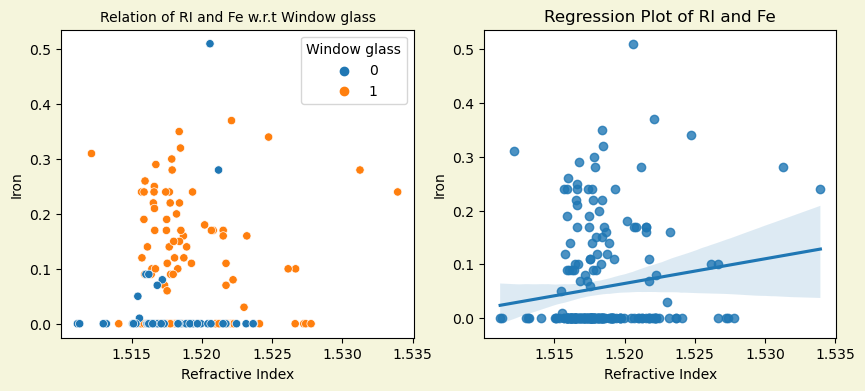

In [32]:
plt.figure(figsize=(10,4),facecolor='beige')

plt.subplot(1,2,1) # plot number 1
# Checking the relation of RI and Fe with respect to Window Glass
sns.scatterplot(data=df_glass, x='RI', y='Fe',hue='Window glass')
plt.title("Relation of RI and Fe w.r.t Window glass", fontsize=10)
plt.xlabel("Refractive Index", fontsize=10)
plt.ylabel("Iron", fontsize=10)

plt.subplot(1,2,2) # plot number 2
# checking regression plot of Refractive Index and Aluminium
sns.regplot(data=df_glass,x="RI",y="Fe")
plt.title("Regression Plot of RI and Fe")
plt.xlabel("Refractive Index")
plt.ylabel("Iron")

plt.show()

Window glass contain more iron as compared to non window glass. and there is slight positive correlation between refractive index and iron.

### Multivariate Analysis:

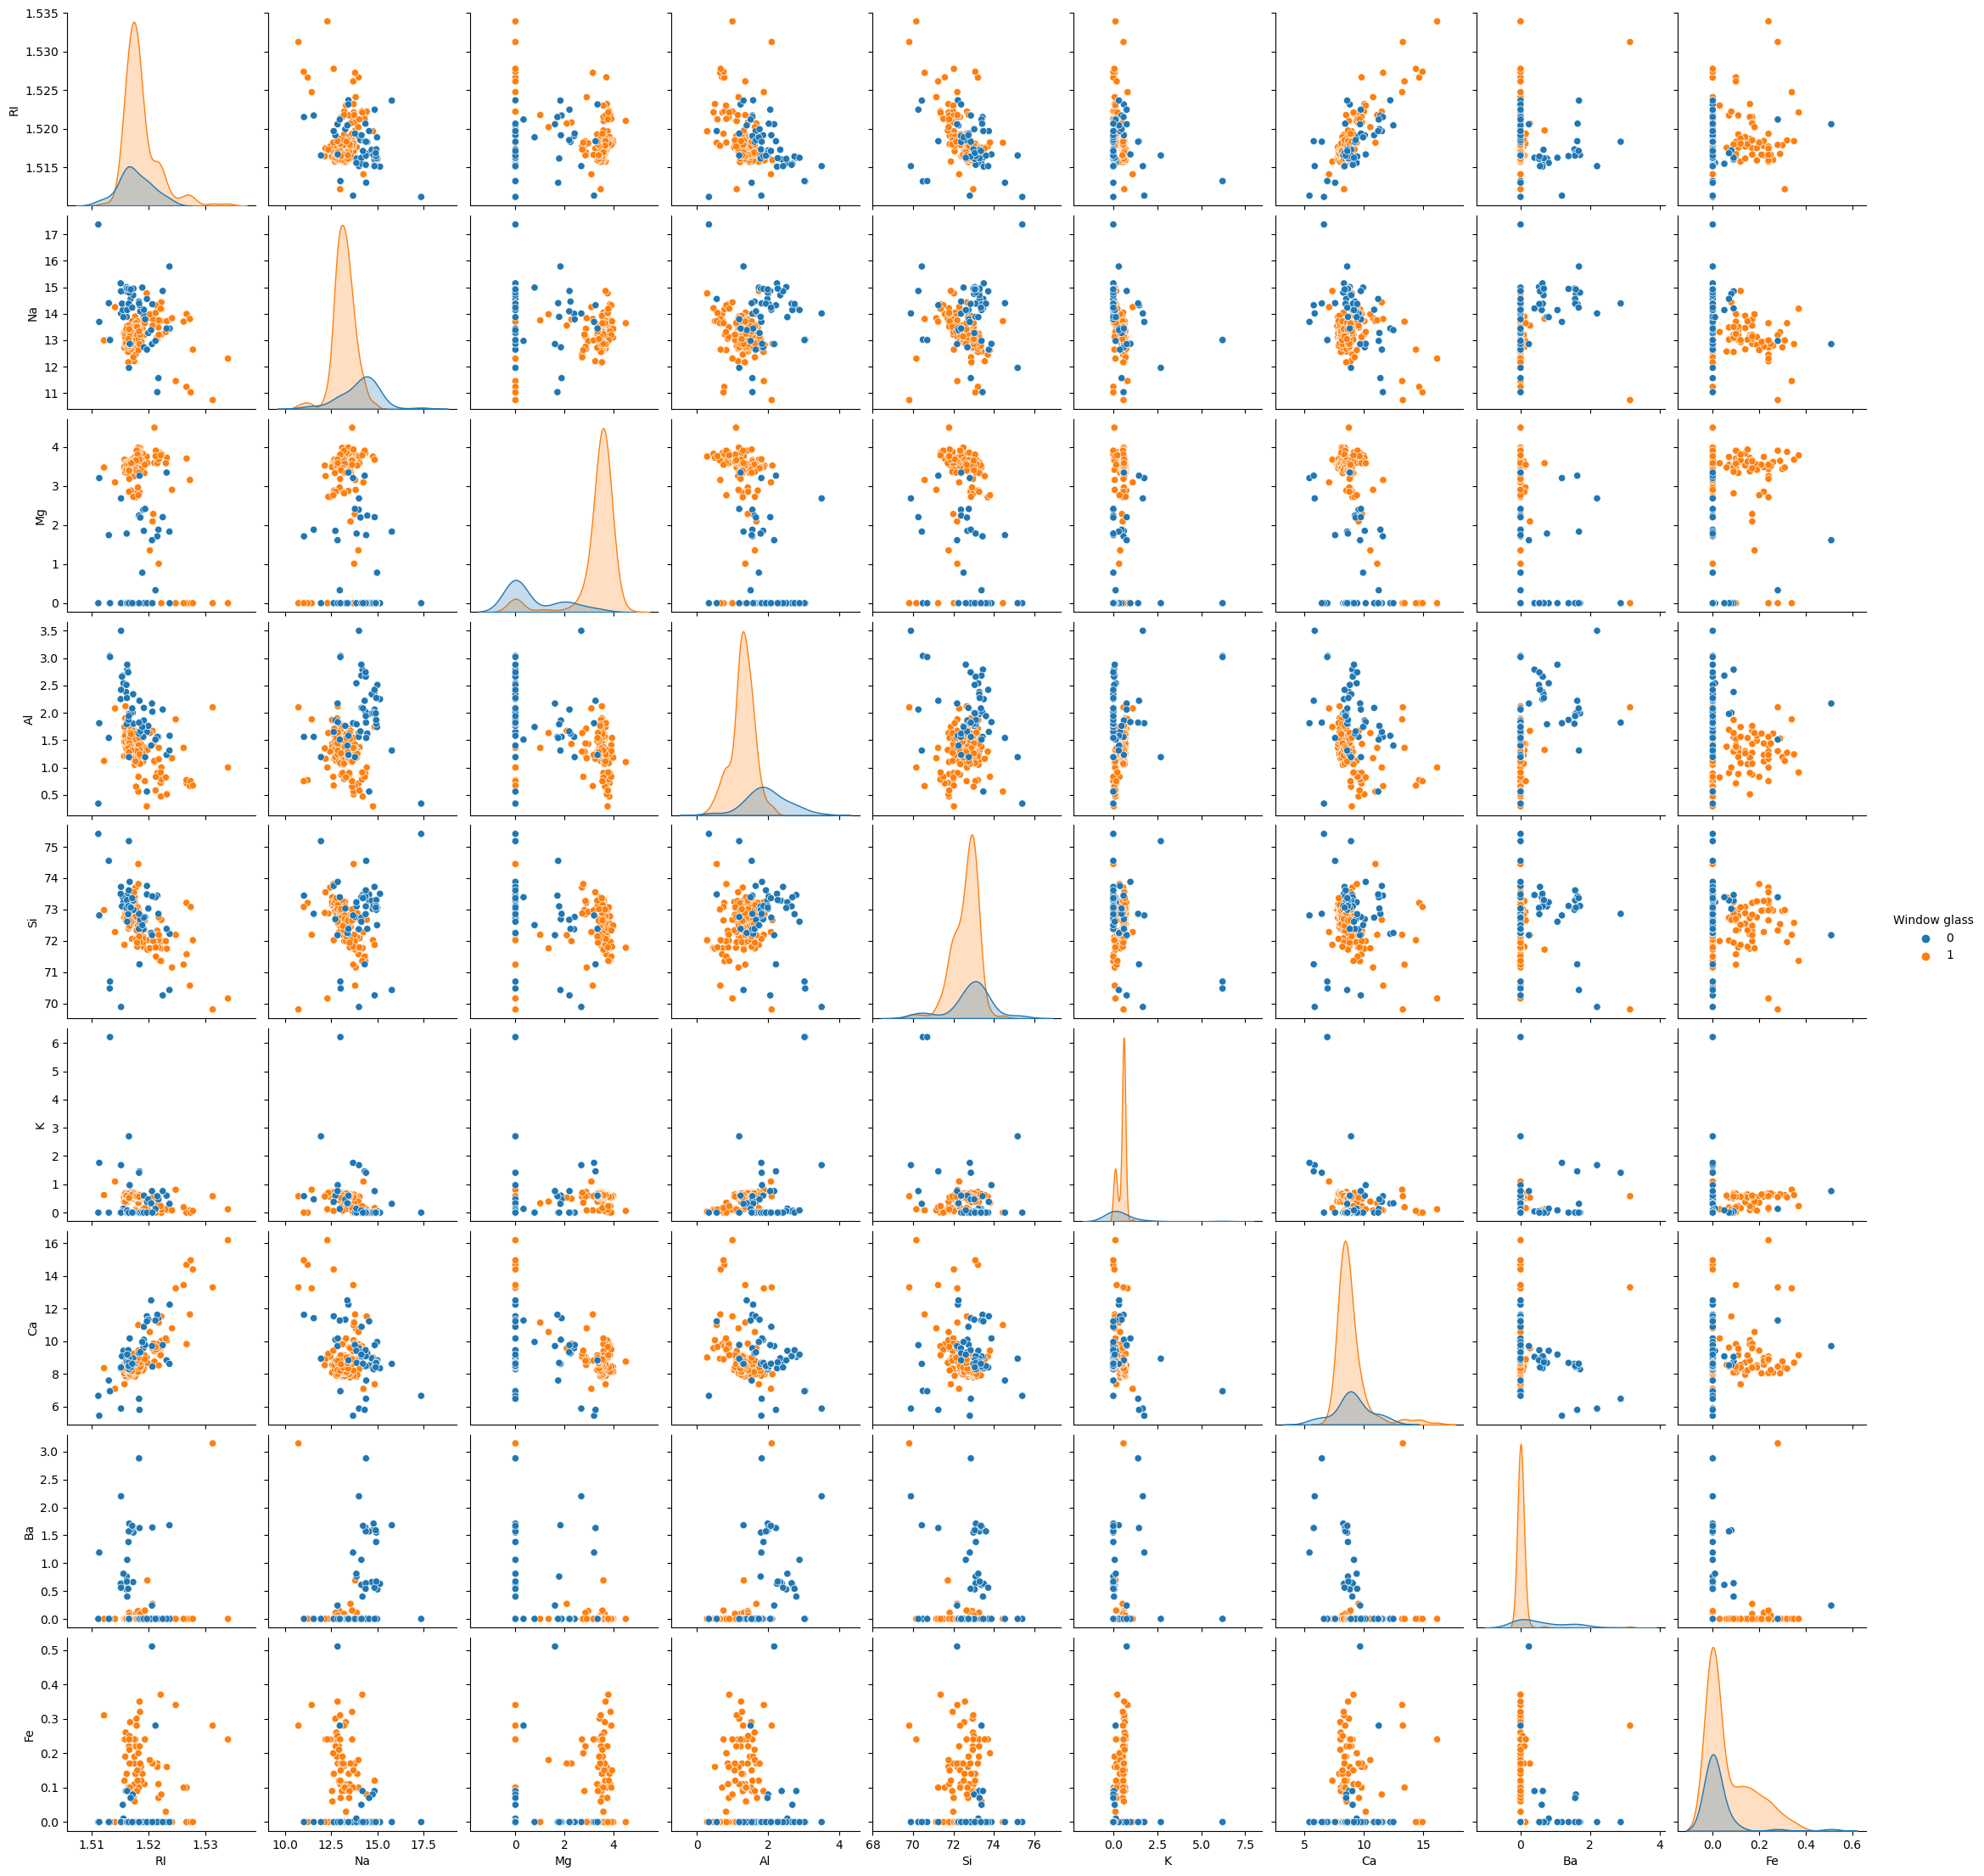

In [33]:
# checking pairplot
sns.pairplot(df_glass, kind='scatter',hue="Window glass")

Observation:
1. The diagonals of the pairplot shows us the kde plot of each column based on windowglass. from the kde graph we can understand wheather data is normally distributed or not.
2. Plots othar than diagonal are the scatter plot which shows us the distribution of data.
    

## Data Preprocessing

In [34]:
# checking for outliers of the data
df_glass.skew()

RI              1.625431
Na              0.454181
Mg             -1.152559
Al              0.907290
Si             -0.730447
K               6.551648
Ca              2.047054
Ba              3.416425
Fe              1.754327
Window glass   -1.237086
dtype: float64

The acceptable range of skewness is -0.5 to +0.5. hare we can observe that there is skewness present in the every column except Na. To remove the skewness we have 1. cube root transformation method, 2. square root transformation method, 3. log transformation method 4. boxcox method etc. Hare we are tring with cube root transformation method.

In [35]:
# Removing skewness using cube root transformation method.
df_glass['RI']=np.cbrt(df_glass['RI'])
df_glass['Mg']=np.cbrt(df_glass['Mg'])
df_glass['Al']=np.cbrt(df_glass['Al'])
df_glass['Si']=np.cbrt(df_glass['Si'])
df_glass['K']=np.cbrt(df_glass['K'])
df_glass['Ca']=np.cbrt(df_glass['Ba'])
df_glass['Fe']=np.cbrt(df_glass['Fe'])

In [36]:
df_glass.skew()

RI              1.617049
Na              0.454181
Mg             -1.440196
Al             -0.204132
Si             -0.776908
K              -0.591896
Ca              2.073007
Ba              3.416425
Fe              0.894683
Window glass   -1.237086
dtype: float64

Still there skewness is present in the dataset. This is may be the reason of outliers presents in the dataset. Lets remove outliers the we will for skewness also.

In [37]:
# import zscore
from scipy.stats import zscore
z=np.abs(zscore(df_glass))

In [38]:
# as per emperical rule thresold limit is 3 for outliers
thresold=3
np.where(z>thresold)

(array([ 21, 106, 106, 106, 106, 106, 107, 107, 112, 163, 163, 163, 163,
        171, 172, 184, 184, 184, 188, 189, 201, 203, 207, 207, 213],
       dtype=int64),
 array([3, 0, 1, 4, 6, 7, 0, 4, 0, 3, 4, 6, 7, 5, 5, 1, 3, 4, 4, 7, 4, 7,
        6, 7, 7], dtype=int64))

In [39]:
#lets look z value those are beyond thresold limit
z.iloc[21,3]

3.4598736506604713

So it is clear that the zscore for the index of (21,3) is greater than 3. hence we need to clean all the outliers data for the better model preparation.

In [40]:
# Removing Outliers
df=df_glass[(z<3).all(axis=1)]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Window glass
0,1.150034,13.64,1.649740,1.032280,4.155926,0.391487,0.000000,0.00,0.0,1
1,1.149176,13.89,1.532619,1.107932,4.174180,0.782974,0.000000,0.00,0.0,1
2,1.148815,13.53,1.525490,1.154800,4.179148,0.730614,0.000000,0.00,0.0,1
3,1.149189,13.21,1.545286,1.088587,4.171883,0.829134,0.000000,0.00,0.0,1
4,1.149129,13.27,1.535452,1.074337,4.180865,0.819321,0.000000,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.148871,14.37,0.000000,1.399319,4.176475,0.000000,0.814325,0.54,0.0,0
209,1.148828,14.14,0.000000,1.422757,4.171883,0.430887,1.019613,1.06,0.0,0
210,1.148985,14.92,0.000000,1.257818,4.180484,0.000000,1.167165,1.59,0.0,0
211,1.149943,14.36,0.000000,1.264107,4.187339,0.000000,1.179274,1.64,0.0,0


In [41]:
# the percentage of data that has to be removed 
print("Percentage of data loss =",((df_glass.shape[0]-df.shape[0])/df_glass.shape[0])*100)

Percentage of data loss = 6.5420560747663545


Hence by zscore method the data loss percentage is about 6.54% which is in permissible limit. Maximum permissible limit is 10%.

In [42]:
# checking skewness present or not
df.skew()

RI              1.155017
Na             -0.006013
Mg             -1.741694
Al             -0.160303
Si             -0.483189
K              -1.297977
Ca              2.212989
Ba              3.239996
Fe              0.837056
Window glass   -1.472543
dtype: float64

still there is skewness present in the dataset. to remove the skewness now we will apply boxcox method. where alpha=0 for log transformation and 0.5 for square root transformation.

In [43]:
from scipy.stats import boxcox

df['RI']=boxcox(df['RI'],0.33)
df['Mg']=boxcox(df['Mg'],0.33)
df['K']=boxcox(df['K'],0.33)
df['Ca']=boxcox(df['Ca'],0.33)
df['Ba']=boxcox(df['Ba'],0.33)
df['Fe']=boxcox(df['Fe'],0.33)

In [44]:
df.skew()

RI              1.153452
Na             -0.006013
Mg             -1.847849
Al             -0.160303
Si             -0.483189
K              -1.975521
Ca              1.920183
Ba              2.207753
Fe              0.700927
Window glass   -1.472543
dtype: float64

by boxcox method we have tried to minimize skewness in the data set. but still there will be some skewness. 

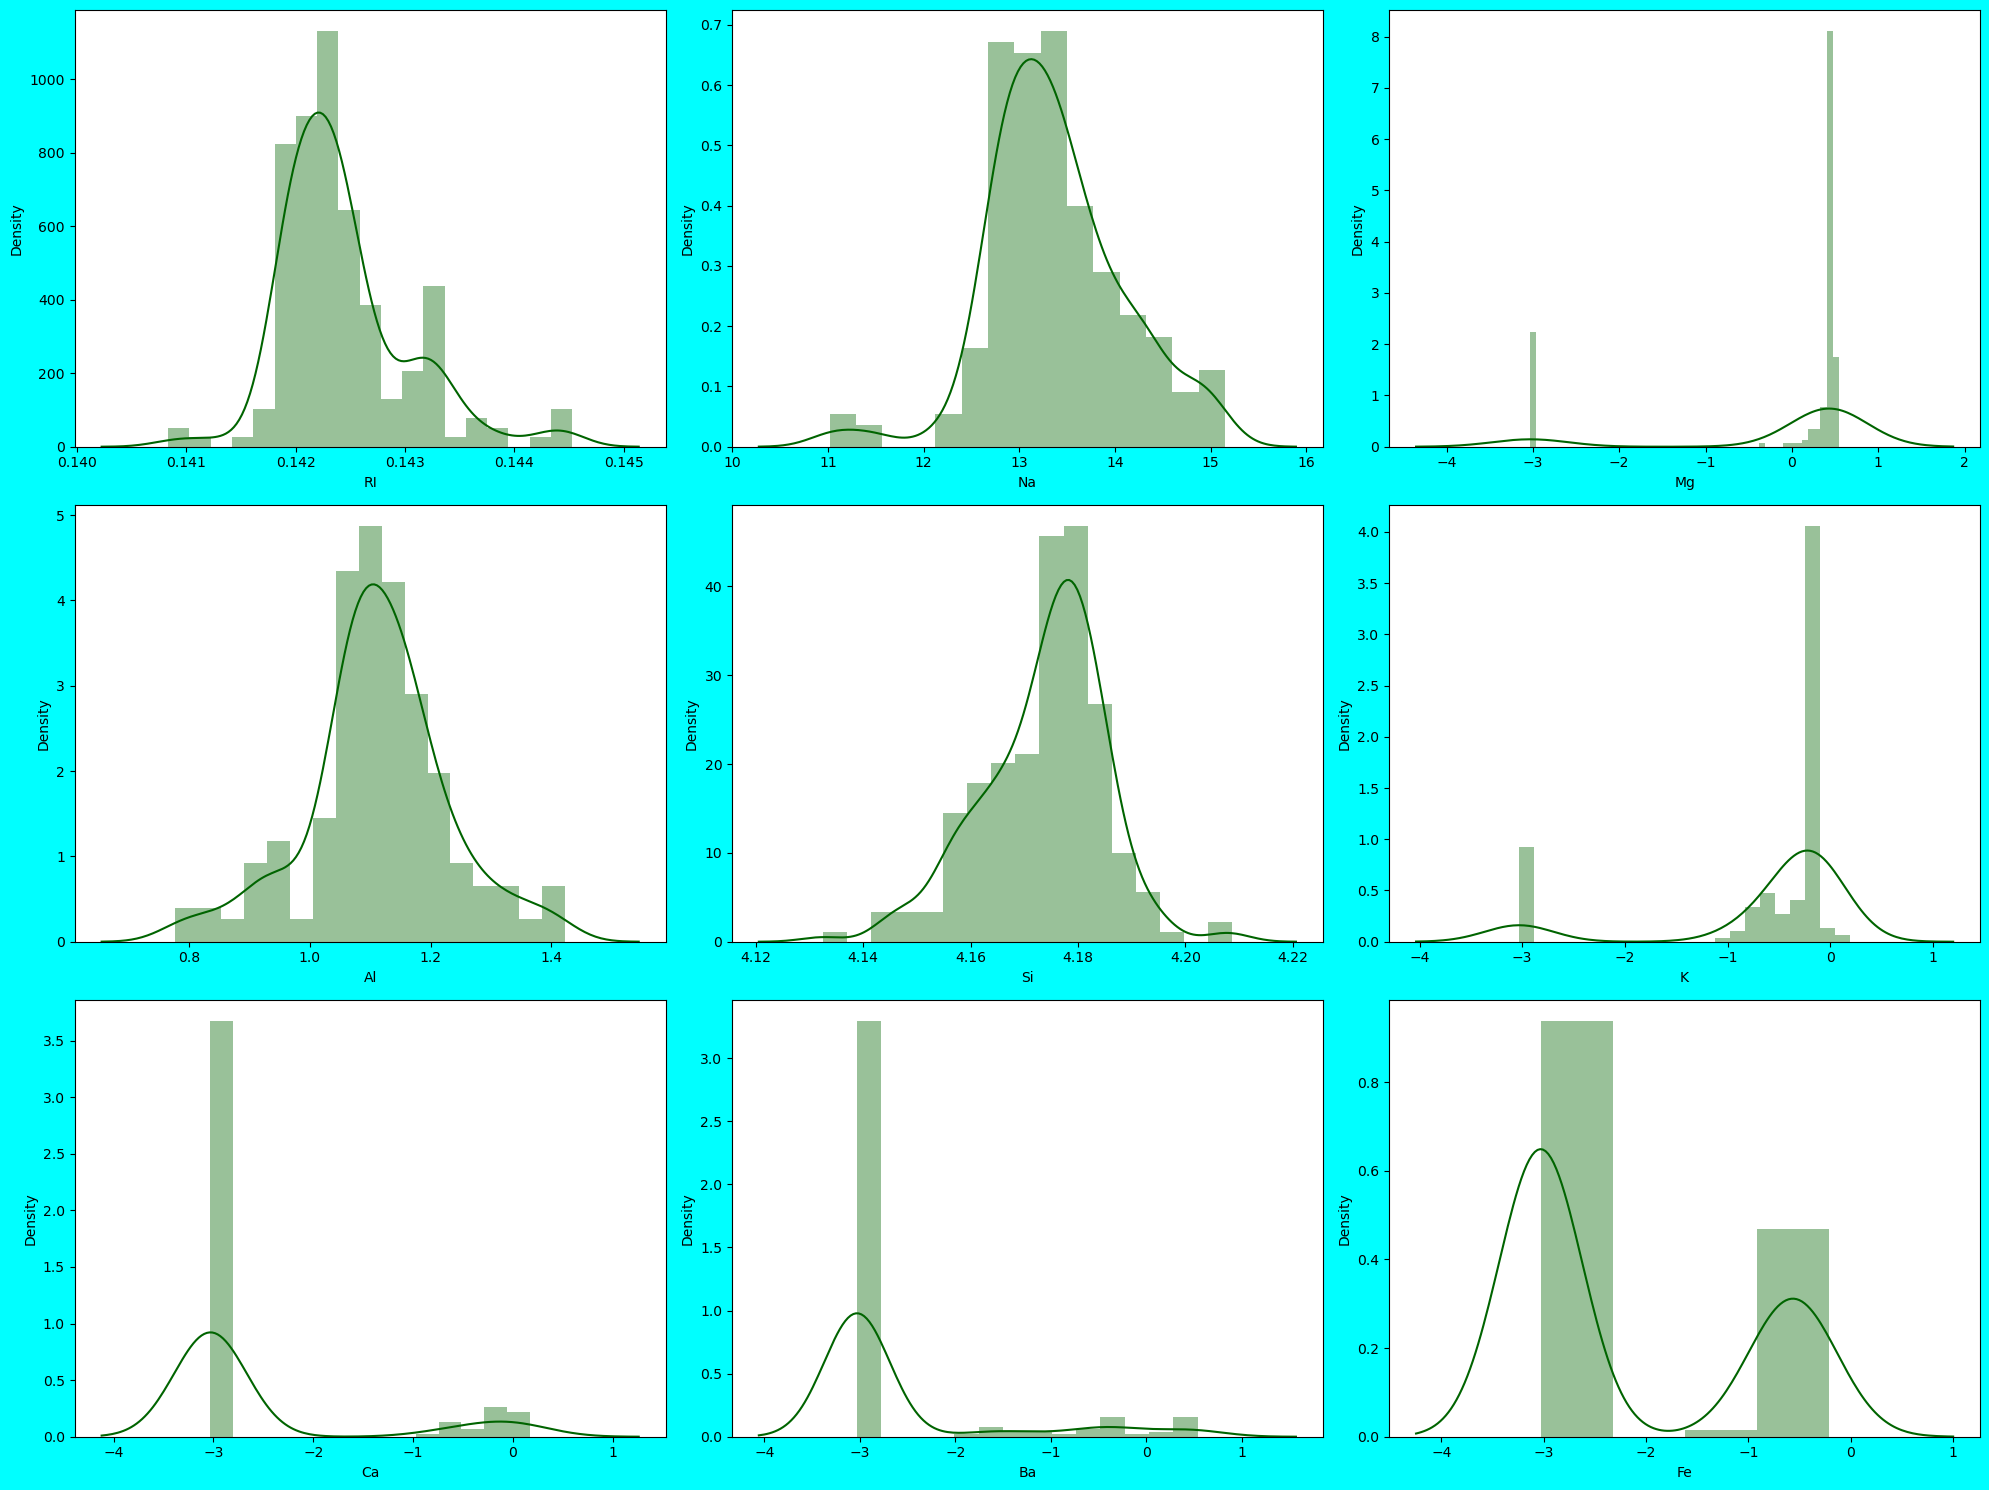

In [45]:
# Visualizing dataset how wel data is normalized
p=1
plt.figure(figsize=(20,15), facecolor="cyan")
for i in df.columns:
    if p<=9:
        plt.subplot(3,3,p)
        sns.distplot(df[i], hist=True, kde=True, color="darkgreen")
    p+=1
plt.tight_layout()


kde curve in the distplot shows that almost in every column data is normally distributed.

                    RI        Na        Mg        Al        Si         K  \
RI            1.000000 -0.099577 -0.078618 -0.529994 -0.565775 -0.102802   
Na           -0.099577  1.000000 -0.370886  0.210068 -0.225458 -0.549956   
Mg           -0.078618 -0.370886  1.000000 -0.419470 -0.301199  0.595652   
Al           -0.529994  0.210068 -0.419470  1.000000  0.312653 -0.134249   
Si           -0.565775 -0.225458 -0.301199  0.312653  1.000000 -0.166606   
K            -0.102802 -0.549956  0.595652 -0.134249 -0.166606  1.000000   
Ca           -0.214443  0.485191 -0.556121  0.522111  0.173119 -0.441173   
Ba           -0.219857  0.520854 -0.594493  0.539098  0.175763 -0.487140   
Fe            0.063627 -0.114303  0.069927 -0.043004 -0.062906  0.178902   
Window glass  0.078406 -0.444490  0.685826 -0.550502 -0.268899  0.607661   

                    Ca        Ba        Fe  Window glass  
RI           -0.214443 -0.219857  0.063627      0.078406  
Na            0.485191  0.520854 -0.114303   

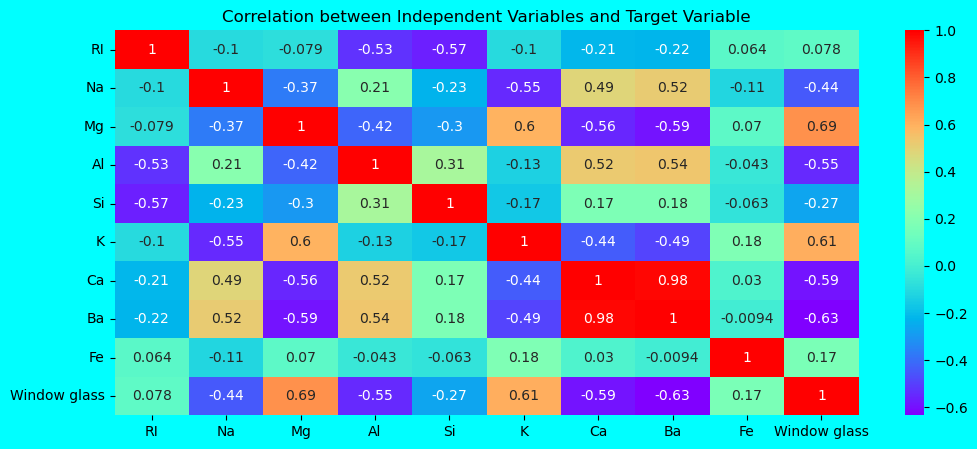

In [46]:
# checking correlation between independent variables and target variable
print(df.corr())
plt.figure(figsize=(12,5), facecolor='cyan')
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.title("Correlation between Independent Variables and Target Variable")
plt.show()

Observation:
1. In the heatmap we can notice that there are some positive relation between target variable and input variable like Magnessium and Potassium.
2. There are some negative correlation between target variable and input variable like Sodium, Aluminium, Calcium and Bareium.
3. There are strong positive correlation inbetween Ba and Ca.

In [47]:
df.corr()["Window glass"].sort_values()

Ba             -0.633873
Ca             -0.592632
Al             -0.550502
Na             -0.444490
Si             -0.268899
RI              0.078406
Fe              0.165418
K               0.607661
Mg              0.685826
Window glass    1.000000
Name: Window glass, dtype: float64

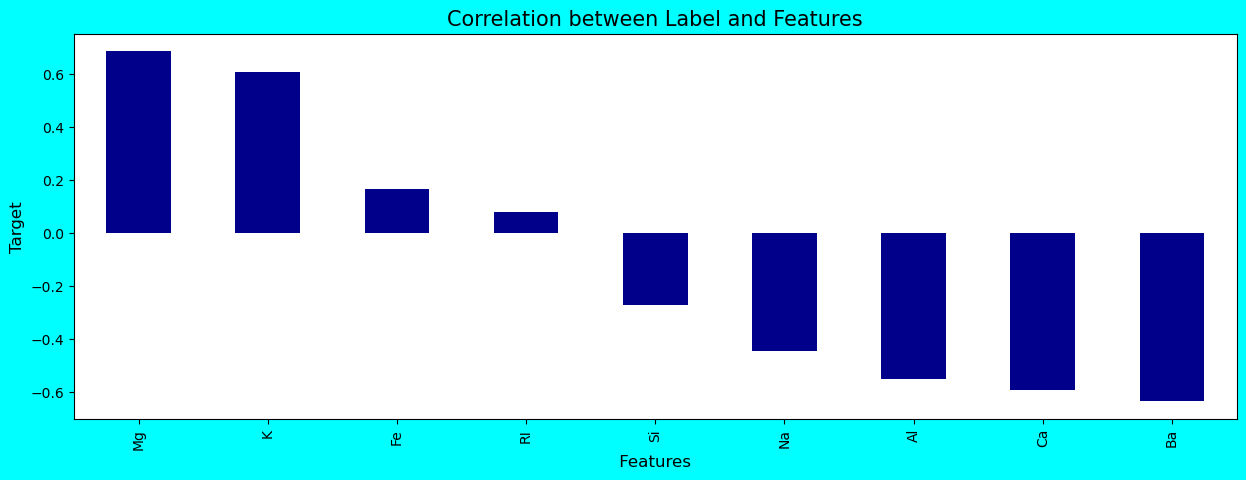

In [48]:
# Visualizing the correlation between label and features using barplot
plt.figure(figsize=(15,5),facecolor="cyan")
df.corr()["Window glass"].sort_values(ascending=False).drop(['Window glass']).plot(kind="bar", color='darkblue')
plt.title("Correlation between Label and Features", fontsize=15)
plt.xlabel(" Features ", fontsize=12)
plt.ylabel("Target", fontsize=12)
plt.show()

Hare we can clearly visualise which column is positively correlative and which column is negatively correlative.

## Feature Engineering

In [49]:
# Seperating Features and target
x=df.iloc[:,:-1] # Features
y=df.iloc[:,-1] # Target variable

In [50]:
# Checking the dimension of label and features
print("Frature dimension=",x.shape)
print("Label dimension=",y.shape)

Frature dimension= (200, 9)
Label dimension= (200,)


In [51]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.085162,0.369913,0.531395,-0.690753,-1.565024,-0.165619,-0.433582,-0.415747,-0.715358
1,-0.251643,0.721608,0.463781,-0.043220,0.039642,0.427960,-0.433582,-0.415747,-0.715358
2,-0.814683,0.215167,0.459556,0.357949,0.476376,0.362403,-0.433582,-0.415747,-0.715358
3,-0.231965,-0.235003,0.471257,-0.208797,-0.162278,0.483360,-0.433582,-0.415747,-0.715358
4,-0.326425,-0.150596,0.465457,-0.330770,0.627312,0.471759,-0.433582,-0.415747,-0.715358
...,...,...,...,...,...,...,...,...,...
195,-0.728031,1.396863,-2.284890,2.450891,0.241341,-2.475141,2.273449,2.092530,-0.715358
196,-0.794989,1.073303,-2.284890,2.651506,-0.162278,-0.091365,2.481921,2.717802,-0.715358
197,-0.550822,2.170592,-2.284890,1.239718,0.593781,-2.475141,2.614899,3.166427,-0.715358
198,0.943744,1.382795,-2.284890,1.293550,1.196397,-2.475141,2.625300,3.203215,-0.715358


We have standarized data using StandardScaler() which help to overcome the issue of biasness.

In [52]:
# Checking Variance inflation factor (VIF) to remove multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Value
0,RI,4.502492
1,Na,3.158088
2,Mg,3.460250
3,Al,2.496890
4,Si,3.943205
5,K,2.574942
6,Ca,29.429217
7,Ba,33.239748
8,Fe,1.085837


By checking vif values we can notice that the features causes multicolinearity problem. Hare we can check that Calcium and Bareium column have vif value greater than 10 which means they have high correlation with each other. so we need to drop the column which have higher vif value.

In [53]:
# Removing Bareium column
x.drop("Ba",axis=1,inplace=True)

In [54]:
#again checking vif values
vif=pd.DataFrame()
vif['Features']=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Value
0,RI,4.435697
1,Na,3.153147
2,Mg,3.326197
3,Al,2.487628
4,Si,3.896458
5,K,2.501620
6,Ca,2.037716
7,Fe,1.071078


Now we can notice that vif values of each column is less than 10 which means now there is no multicolinearity problem.

In [55]:
# Checking wheather dataset is balanced or not
y.value_counts()

1    159
0     41
Name: Window glass, dtype: int64

We can notice that window glass is of 159 and non window glass is 41. which refers to the imbalance problem of the dataset.

In [56]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [57]:
# Checking the countings of data in label
y1.value_counts()

1    159
0    159
Name: Window glass, dtype: int64

Now we can notice that dataset is balanced as total data of window glass and non window glass is same.

## Modeling

In [58]:
# Finding the best Random State
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(f"Best Accuracy is {maxAccu} at random state {maxRS}")

Best Accuracy is 1.0 at random state 8


In [59]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

In [60]:
# Spliting the training data and test data
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)
print(f'The no of rows of traing data is {x_train.shape[0]} and \nThe no of rows of test data is {x_test.shape[0]}')

The no of rows of traing data is 222 and 
The no of rows of test data is 96


In [61]:
# Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score in RFC :', accuracy_score(y_test,predrfc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predrfc),"\n")
print("Classification Report:\n", classification_report(y_test,predrfc))

Accuracy Score in RFC : 1.0 

Confusion Matrix: 
 [[46  0]
 [ 0 50]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        50

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



accuracy score in random state classifier is 1 which means 100% accurate.

In [62]:
# Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print('Accuracy Score in ET :', accuracy_score(y_test,predet),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predet),"\n")
print("Classification Report:\n", classification_report(y_test,predet))

Accuracy Score in ET : 1.0 

Confusion Matrix: 
 [[46  0]
 [ 0 50]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        50

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [63]:
# Ada Boost Classifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score in AdaBoost :', accuracy_score(y_test,predad),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predad),'\n')
print("Classification Report:\n", classification_report(y_test,predad))

Accuracy Score in AdaBoost : 0.9479166666666666 

Confusion Matrix: 
 [[46  0]
 [ 5 45]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       1.00      0.90      0.95        50

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



In [64]:
# Bagging Classifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print('Accuracy Score in Bagging :', accuracy_score(y_test,predbc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predbc),"\n")
print("Classification Report:\n", classification_report(y_test,predbc))

Accuracy Score in Bagging : 0.9895833333333334 

Confusion Matrix: 
 [[46  0]
 [ 1 49]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        50

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In [65]:
# Lofistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy Score in LR :', accuracy_score(y_test,predlr),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predlr),"\n")
print("Classification Report: \n", classification_report(y_test,predlr))

Accuracy Score in LR : 0.9583333333333334 

Confusion Matrix: 
 [[43  3]
 [ 1 49]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.94      0.98      0.96        50

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



In [66]:
# Support Vector Machine
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score in SVC :', accuracy_score(y_test,predsvc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predsvc),"\n")
print("Classification Report:\n", classification_report(y_test,predsvc))

Accuracy Score in SVC : 0.9895833333333334 

Confusion Matrix: 
 [[46  0]
 [ 1 49]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        50

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In [67]:
# Gaussian Naive Bayes
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy Score in GNB :', accuracy_score(y_test,predgnb),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predgnb),"\n")
print("Classification Report:\n", classification_report(y_test,predgnb))

Accuracy Score in GNB : 0.9375 

Confusion Matrix: 
 [[40  6]
 [ 0 50]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.89      1.00      0.94        50

    accuracy                           0.94        96
   macro avg       0.95      0.93      0.94        96
weighted avg       0.94      0.94      0.94        96



In [68]:
# stochastic gradient descent classifier
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
predsgdc=rfc.predict(x_test)
print('Accuracy Score in SGDC :', accuracy_score(y_test,predsgdc),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,predsgdc),'\n')
print("Classification Report:\n", classification_report(y_test,predsgdc))

Accuracy Score in SGDC : 1.0 

Confusion Matrix: 
 [[46  0]
 [ 0 50]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        50

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [69]:
# K nearest neighbors classifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
print('Accuracy Score in KNC :', accuracy_score(y_test,predknc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predknc),'\n')
print("Classification Report:\n", classification_report(y_test,predknc))

Accuracy Score in KNC : 0.96875 

Confusion Matrix: 
 [[44  2]
 [ 1 49]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.96      0.98      0.97        50

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



In [70]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score in DTC :', accuracy_score(y_test,preddtc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,preddtc),'\n')
print("Classification Report\n", classification_report(y_test,preddtc))

Accuracy Score in DTC : 0.9791666666666666 

Confusion Matrix: 
 [[45  1]
 [ 1 49]] 

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.98      0.98      0.98        50

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



In [71]:
# Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy Score in GB :', accuracy_score(y_test,predgb),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,predgb),'\n')
print("Classification Report:\n", classification_report(y_test,predgb))

Accuracy Score in GB : 0.9895833333333334 

Confusion Matrix: 
 [[46  0]
 [ 1 49]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        50

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In Several model like Random Forest Classifier, Extra Tree classifier, Bagging Classifier, stochastic gradient descent classifier, Decision Tree Classifier and  Gradient Boosting Classifier we got 100% accuracy score. All of these model is working well.As we have obtained maximum accuracy value i.e. 100% then we need no to do hyper parameter tuning. Because hyperparameter tuning we do to improve accuracy score. Hate I am saving the model named Random Forest Classifier.

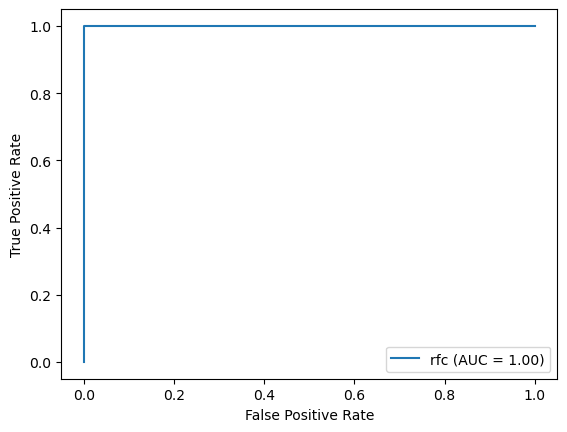

In [72]:
# Looking Auc Roc curve
from sklearn import metrics
fpr,tpr,thresold=metrics.roc_curve(y_test,predrfc)
roc_auc=metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='rfc')
display.plot()

### Saving the model

In [73]:
# importing joblib  libraries
import joblib
# saving the model
joblib.dump(rfc,"glass_quality.pkl")

['glass_quality.pkl']

### Loading the model and predicting from it

In [74]:
# Loading the saved model
model=joblib.load("glass_quality.pkl")
# Predicting from the saved model
prediction=model.predict(x_test)
glass_quality_df=pd.DataFrame()
glass_quality_df['Actual Value']=y_test
glass_quality_df["Predicted Value"]= prediction
glass_quality_df

,Actual Value,Predicted Value
141,1,1
257,0,0
277,0,0
293,0,0
17,1,1
...,...,...
294,0,0
243,0,0
301,0,0
50,1,1


We can see that the Random Forest model performs well and gives 100% accuracy.

Thank You..!!